In [1]:
# Import pandas for data processing
import pandas as pd
# Fit and Transform the data for MinMax normalization
from sklearn.preprocessing import minmax_scale

# import KMeans for clustering
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt


In [2]:

# Read the dataset
dataset = pd.read_csv("studentclusters.csv")
X = dataset.copy()

<AxesSubplot:xlabel='marks', ylabel='shours'>

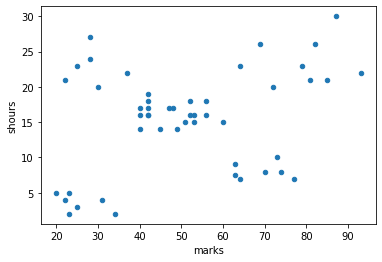

In [3]:

# Visualise the data using Scatter plot
X.plot.scatter(x='marks', y='shours')

In [4]:

X_scaled = minmax_scale(X)

In [15]:

kmeans = KMeans(n_clusters=3, random_state=1234)

In [16]:
#fit the data to get the clusters
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=1234)

ref:https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
Attributes:
cluster_centers_ndarray of shape (n_clusters, n_features)
Coordinates of cluster centers. If the algorithm stops before fully converging (see tol and max_iter), these will not be consistent with labels_.

labels_ndarray of shape (n_samples,)
Labels of each point

In [17]:
#how do you know which data point has gone to which cluster?
#cluster_center
labels = kmeans.labels_
labels

array([1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 2, 2, 0, 1])

Specified 3 clusters so will see cluster 0,1, and 2 

#visualize usign scatter plot to see how they have been formed using pandas scatter plot


In [22]:
# Visualise the clusters
labels = pd.DataFrame(labels)
df = pd.concat([X, labels], axis=1)
df

,marks,shours,0
0,72,20.0,1
1,42,19.0,2
2,77,7.0,1
3,93,22.0,1
4,30,20.0,2
5,53,15.0,2
6,74,8.0,1
7,28,24.0,2
8,69,26.0,1
9,64,7.0,1


In [24]:
df = df.rename(columns={0:'label'})

<AxesSubplot:xlabel='marks', ylabel='shours'>

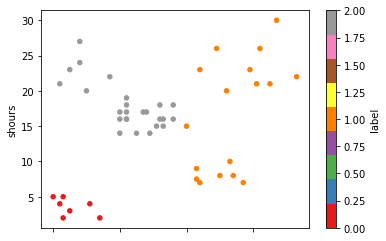

In [29]:
#scatter plot to view which data point has gone to which cluster based
#on label values
#matplotlib colormap:
#colormap:Set1 - based on label values, change the color and provide color map

df.plot.scatter(x='marks', y='shours', c='label', colormap='Set1')

the letter the distance from the point and centriod, the better the relationship and explaination of the data

In [34]:
#we have choosen 3 clusters.  Let change the number to 5
kmeans = KMeans(n_clusters=5, random_state=1234)

<AxesSubplot:xlabel='marks', ylabel='shours'>

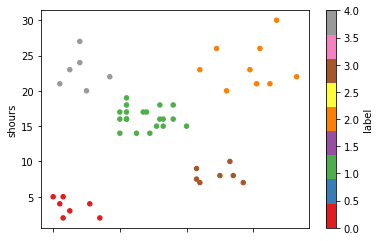

In [35]:

#fit the data to get the clusters
kmeans.fit(X_scaled)

labels = kmeans.labels_
labels = pd.DataFrame(labels)
df = pd.concat([X, labels], axis=1)
df = df.rename(columns={0:'label'})
########################
#trial and error
#################
#this works better but its not feasible or practical to run this type of
#trial and error
df.plot.scatter(x='marks', y='shours', c='label', colormap='Set1')

#as we add more signs and features we need a scientific method to decide
#the number of clusters: elbow method

#create multple cluster and measure distnace, square and take the sum of square
#distances -- this is call inertia.

Higher number of clusters --> lesser sum of squared distance(inertia)
Inertia will equal 0 if you have a cluster for every observation

In [36]:

# Fit the input data. Create labels and get inertia

inertia = kmeans.inertia_
_

<AxesSubplot:xlabel='marks', ylabel='shours'>

In [43]:

# Elbow method to determine optimum clusters
#create array up to 15 clusters

#store the value of inertia in a list
inertia = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)   
    
    #append value to the list
    inertia.append(kmeans.inertia_)  
    



Text(0, 0.5, 'Squared Sum (Inertia)')

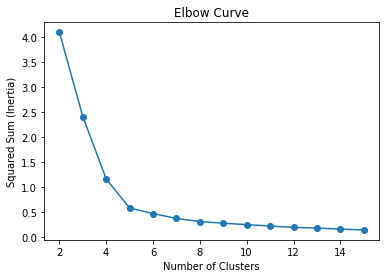

In [48]:
#plot usign matplotlib

#plot range the same as the range in the for loop

#y-axis=inertia
#x-axis = use o as the marker
plt.plot(range(2,16), inertia, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Squared Sum (Inertia)')

Notice the drop is not significant after 5.  5 is the ultimate number of clusters for the input data